In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Comparison of 7 Skin Cancer Diagnosis


##### How do we know if age is a factor in getting skin cancer?

#### Does getting older increases the average rate of skin cancer



## Dataset: HAM10000_metadata.csv
#### Source : Kaggle database
#### Description: Comparison of male and female population of patient diagnosed with skin cancer and average age
#### Age: 0 to 100 years old

In [41]:
skin_cancer_df = pd.read_csv('HAM10000_metadata.csv')
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
clean_skin_df = clean_skin_df.loc[clean_skin_df['sex'] != 'unknown']
clean_skin_df = clean_skin_df.loc[clean_skin_df['localization'] != 'unknown']

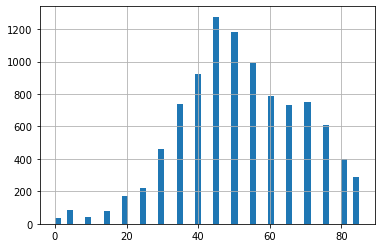

In [42]:
clean_skin_df['age'].hist(bins=50);

....

From the graph it appears that alarger number of skin cancer instances are significant with an age range of  30 to 60

Lets drill through further to see which skin cancer diagnosis has a large data points then combare the  distribution of males and females

....

In [26]:
dx_clean_df = pd.DataFrame(clean_skin_df, columns = ['dx'])
dx_clean_df = dx_clean_df['dx'].value_counts()
#print(dx_clean_df)

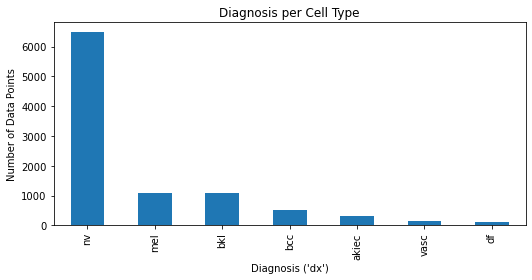

In [27]:
#plot a bar graph to show the different type of skin cancer cells
dx_clean_df.plot(kind="bar",figsize=(7.5,4))
plt.xlabel("Diagnosis ('dx')")
plt.ylabel("Number of Data Points")
plt.title("Diagnosis per Cell Type")
plt.tight_layout()

---
The above plot  represent the different skin cancer diagnosis and the most prevelance skin cancer cell type with over 6000 data points for both gender is Melanecytic nevi, the rest of the diagnosis has  a reletively lower data points of a 1000 and below.

----

In [28]:

to_drop = ['lesion_id',
            'image_id',
            'dx_type',
           'localization',
            'dx_type'
          ]

clean_skin_df.drop(to_drop, inplace=True, axis=1)

In [29]:
#clean_skin_df['dx'].is_unique
clean_skin_df = clean_skin_df.set_index('dx')
bkl_dx=clean_skin_df.loc["bkl"]
bkl=bkl_dx.value_counts()
#print(bkl)

In [30]:
#mean for female with nv diagnosis 
female_with_bkl = bkl_dx[bkl_dx["sex"] == 'female']
female_with_bkl['age'].mean()


62.418655097613886

In [31]:

#mean for female with Bkl diagnosis 
male_with_bkl = bkl_dx[bkl_dx["sex"] == 'male']
male_with_bkl['age'].mean()

65.82926829268293

In [32]:
stats.ttest_ind(female_with_bkl.age, male_with_bkl.age, equal_var=False)

Ttest_indResult(statistic=-3.9637425771086563, pvalue=7.905966344934406e-05)

In [33]:


#clean_skin_df['dx'].is_unique
#clean_skin_df = clean_skin_df.set_index('dx')
nv_dx=clean_skin_df.loc["nv"]
nv=bkl_dx.value_counts()
#print(bkl)

In [34]:
#mean for female with nv diagnosis 
female_with_nv = nv_dx[nv_dx["sex"] == 'female']
female_with_nv['age'].mean()

44.17753738466433

In [35]:
#mean for female with Bkl diagnosis 
male_with_nv = nv_dx[nv_dx["sex"] == 'male']
male_with_nv['age'].mean()

48.83960573476703

In [36]:
stats.ttest_ind(female_with_nv.age, male_with_nv.age, equal_var=False)

Ttest_indResult(statistic=-12.551170922436889, pvalue=1.0191723642186528e-35)

In [37]:
#clean_skin_df['dx'].is_unique
#clean_skin_df = clean_skin_df.set_index('dx')
mel_dx=clean_skin_df.loc["mel"]
mel=mel_dx.value_counts()
#print(bkl)

In [38]:
#mean for female with nv diagnosis 
female_with_mel = mel_dx[mel_dx["sex"] == 'female']
female_with_mel['age'].mean()

56.347517730496456

In [39]:
#mean for female with Bkl diagnosis 
male_with_mel = mel_dx[mel_dx["sex"] == 'male']
male_with_mel['age'].mean()

63.259587020648965

In [40]:
stats.ttest_ind(female_with_mel.age, male_with_mel.age, equal_var=False)

Ttest_indResult(statistic=-7.258689376573507, pvalue=9.346411404400889e-13)

----

Based on the leading 3 dianosis all has a p value that is greater than 0.5

we do not reject the results but further research and analysis is needed to further identify the relationship between age and getting skin cancer


----